In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cycler
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [2]:
url_data = "/home/dm/Документы/разное/mail_test/python_task_dataset.csv"

In [3]:
df = pd.read_csv(url_data)

df.shape

(265403, 8)

### <div style='background:#2b9084;color:white;padding:0.5em;border-radius:0.2em'>Предварительный просмотр данных</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265403 entries, 0 to 265402
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   device_id    265403 non-null  int64 
 1   device_type  265403 non-null  object
 2   datetime     265403 non-null  object
 3   ev_type      265403 non-null  int64 
 4   adv_type     265403 non-null  object
 5   region_id    265403 non-null  int64 
 6   age          265403 non-null  int64 
 7   gender       265403 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 16.2+ MB


In [5]:
df.head(2)

,device_id,device_type,datetime,ev_type,adv_type,region_id,age,gender
0,100001,android,2019-03-01 15:58:02,0,multi,2,14,2
1,100001,android,2019-03-01 17:13:53,0,multi,2,14,2


In [6]:
df.tail(2)

,device_id,device_type,datetime,ev_type,adv_type,region_id,age,gender
265401,287157,android,2019-03-08 15:48:19,0,video,1,25,1
265402,287158,android,2019-03-08 15:17:29,0,video,2,29,1


In [7]:
df_tmp = df.sort_values('datetime').reset_index()
start_date = df_tmp['datetime'].iloc[0]
finish_date = df_tmp['datetime'].iloc[-1]

print(f"Данные собраны за период с: {start_date} по {finish_date}")

Данные собраны за период с: 2019-03-01 00:00:01 по 2019-03-09 23:59:56


In [8]:
print(f"Количество разных девайсов: {df['device_type'].nunique()}")
print(f"Типы девайсов: {df['device_type'].unique()}")

Количество разных девайсов: 2
Типы девайсов: ['android' 'ios']


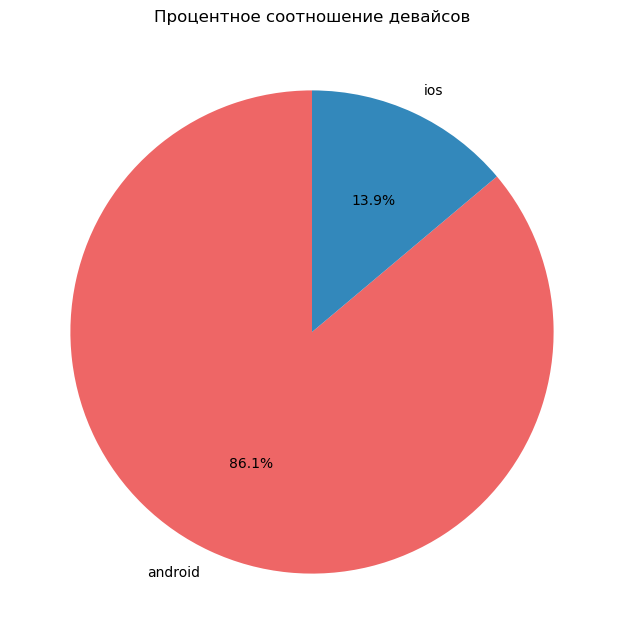

In [9]:
labels = ['android', 'ios']
plt.pie(df['device_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение девайсов")
plt.show()

In [10]:
print(f"Кол-во типов рекламы: {df['adv_type'].nunique()}")
print(f"Типы рекламы: {df['adv_type'].unique()}")

Кол-во типов рекламы: 2
Типы рекламы: ['multi' 'video']


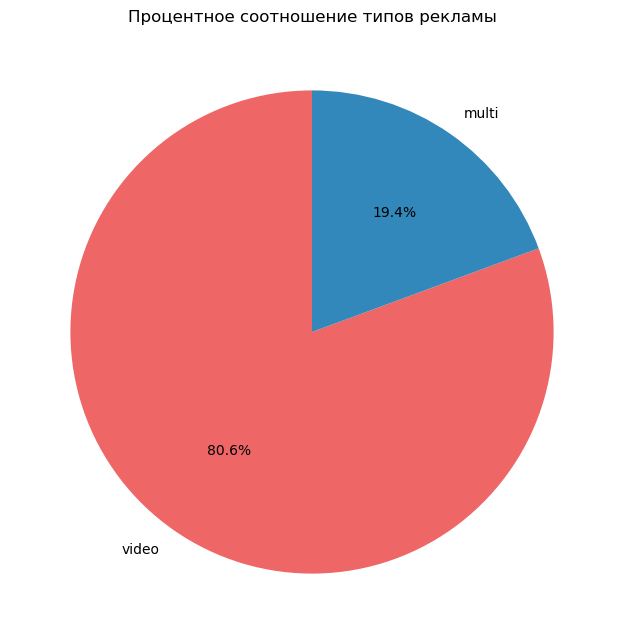

In [11]:
labels = ['video', 'multi']
plt.pie(df['adv_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение типов рекламы")
plt.show()

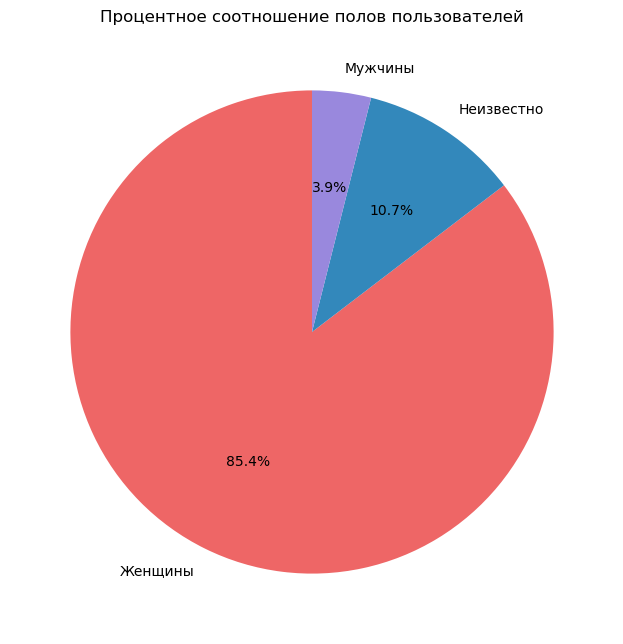

In [12]:
labels = ['Женщины', 'Неизвестно', 'Мужчины']
plt.pie(df['gender'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение полов пользователей")
plt.show()

**Не ясно, что является 0. Предположим что это, согласно новой этике, Небинарный человек (возможно просто неизвестен пол человека)**

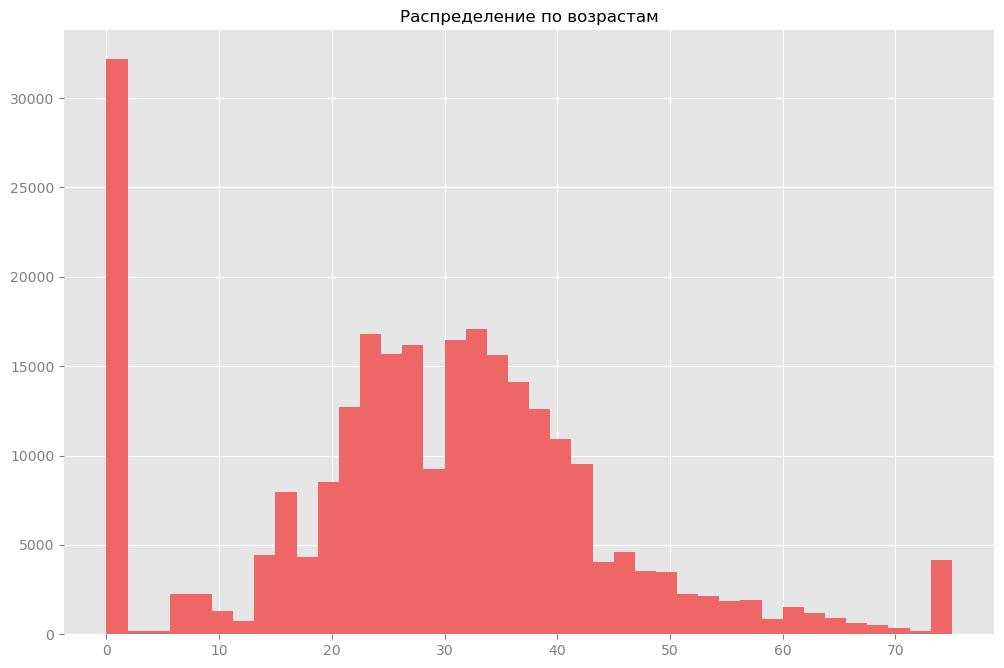

In [13]:
plt.hist(df['age'], bins=40)
plt.title("Распределение по возрастам")
plt.show()

In [14]:
df['region_id'].value_counts()

1    211011
2     54392
Name: region_id, dtype: int64

В первом регионе живет примрено в 4 раза больше людей, чем во втором

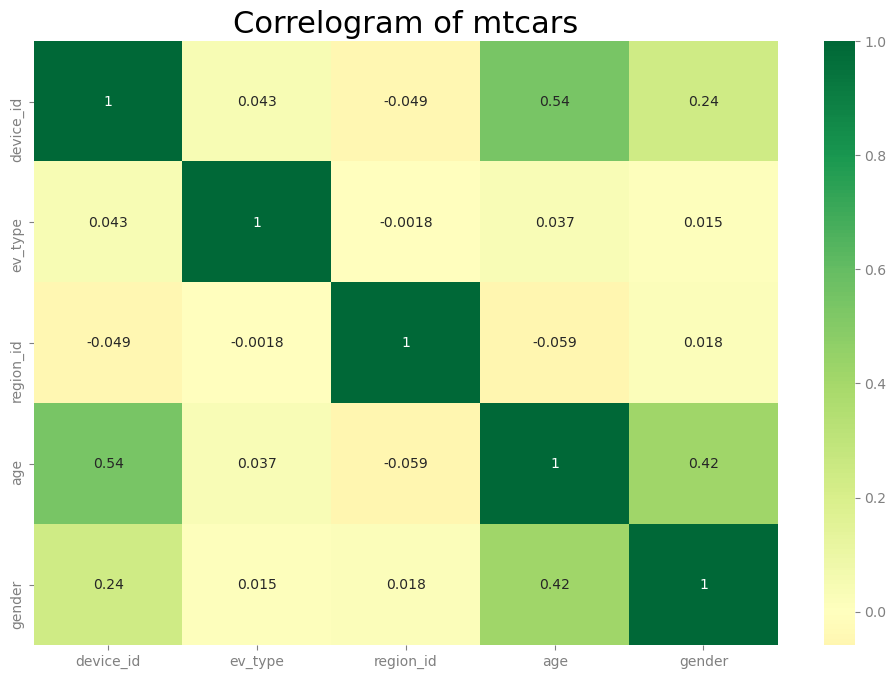

In [15]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)

plt.show()

Предварительная оценка:

    - классы несбалансированы
    - на первый взгляд больше женщины, которые пользуются андройдом составляют большую группу
    - необходимо посмотреть на показы/клики и регион

### <div style='background:#2b9084;color:white;padding:0.5em;border-radius:0.2em'>Пользователи женщины</div>

In [16]:
logic_1 = df['gender'] == 1

df_w = df[logic_1]

print(f"процентное отношение кол-ва женщин в датасете: {round(df_w.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете: 85.39


In [17]:
logic_2 = df['device_type'] == "android"

df_w_a = df[logic_1 & logic_2]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: {round(df_w_a.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: 71.52


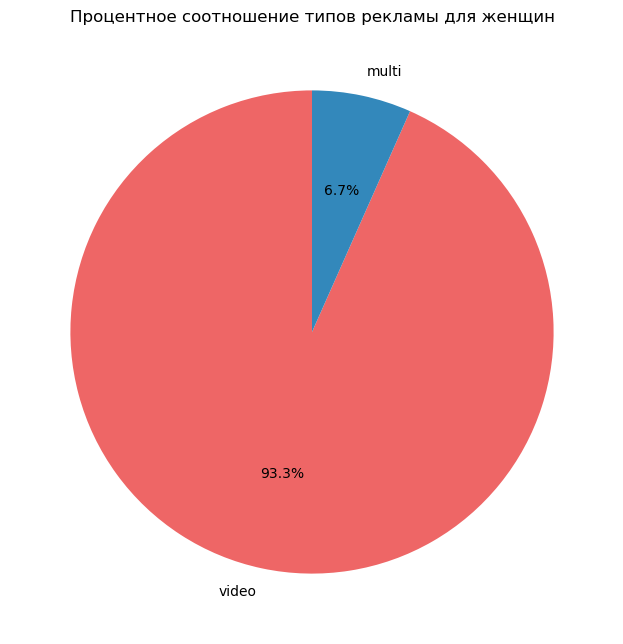

In [18]:
labels = ['video', 'multi']
plt.pie(df_w_a['adv_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение типов рекламы для женщин")
plt.show()

In [19]:
logic_3 = df['adv_type'] == "video"

df_w_a_v = df[logic_1 & logic_2 & logic_3]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: {round(df_w_a_v.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: 66.76


Это довольно большой процент людей. Теперь поймем:

    1) из какого они региона
    2) происходит показ и клик
    3) в каком возрасте чаще смотрят


#### <div style='background:#2b9011;color:white;padding:0.5em;border-radius:0.2em'>1) Регион</div>

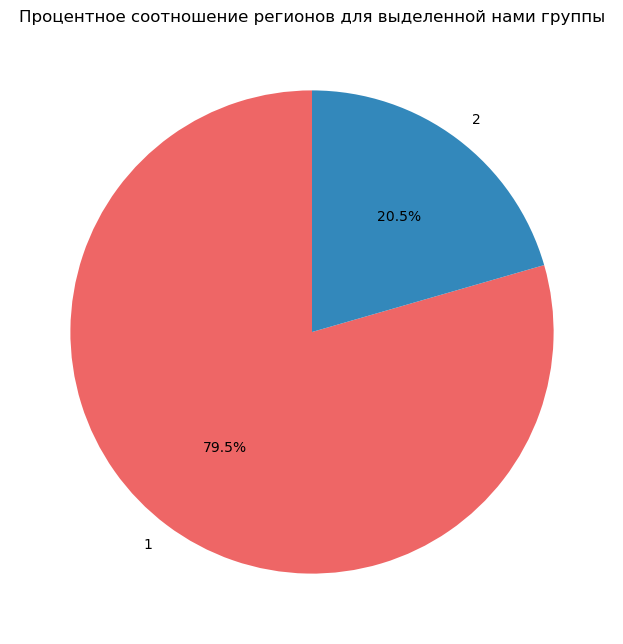

In [20]:
labels = ['1', '2']
plt.pie(df_w_a_v['region_id'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение регионов для выделенной нами группы")
plt.show()

Для выделенной нами группы сохраняется пропорция - 80% людей живет в первом регионе

In [21]:
logic_4 = df['region_id'] == 1

df_w_a_v_r = df[logic_1 & logic_2 & logic_3 & logic_4]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: {round(df_w_a_v_r.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются андройдом: 53.05


#### <div style='background:#2b9011;color:white;padding:0.5em;border-radius:0.2em'>2) Показ/клик</div>

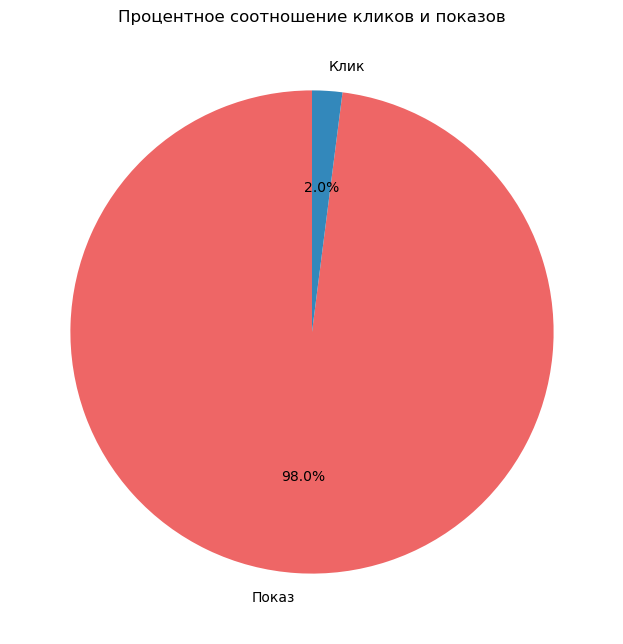

In [22]:
labels = ['Показ', 'Клик']
plt.pie(df_w_a_v_r['ev_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение кликов и показов")
plt.show()

Только 2 процента кликают на рекламу

In [23]:
logic_5 = df['ev_type'] == 1

df_w_a_v_r_e = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются андройдом и кликают: {round(df_w_a_v_r_e.shape[0] / df_w_a_v_r.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются андройдом и кликают: 2.02


In [24]:
print(f"женщин кликают: {df_w_a_v_r_e.shape[0]} из {df_w_a_v_r.shape[0]}")

женщин кликают: 2840 из 140804


#### <div style='background:#2b9011;color:white;padding:0.5em;border-radius:0.2em'>3) Возраст</div>

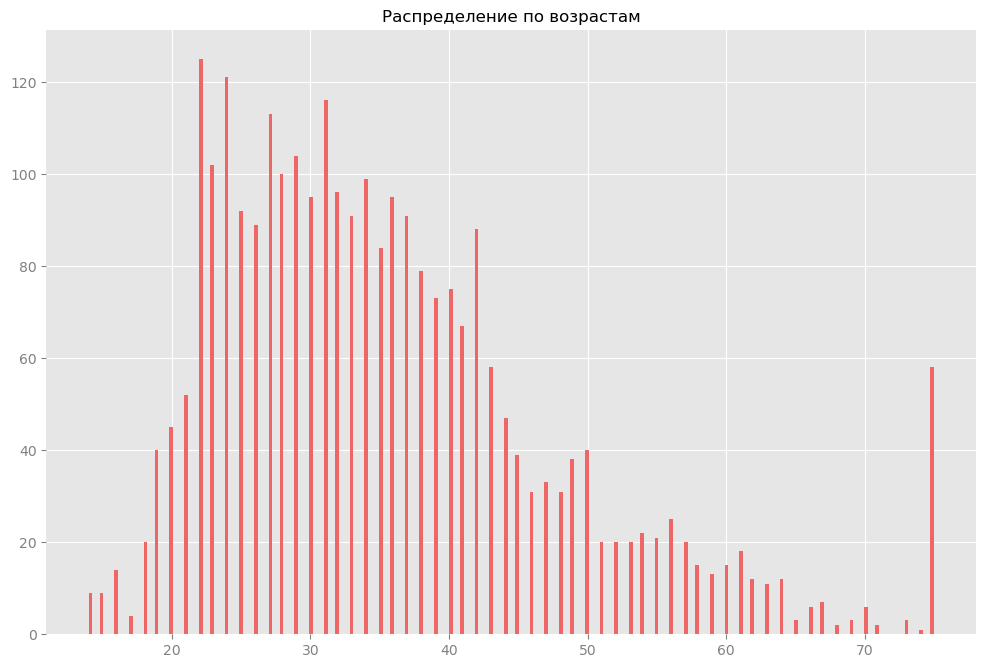

In [25]:
plt.hist(df_w_a_v_r_e['age'], bins=230)
plt.title("Распределение по возрастам")
plt.show()

In [26]:
logic_6 = df['age'] >= 75

df_w_a_v_r_e_a = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5 & logic_6]
df_w_a_v_r_e_a1 = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_6]

print(f"процентное отношение кол-ва женщин в возрасте старше 75 в датасете, которые пользуются андройдом и кликают: {round(df_w_a_v_r_e_a.shape[0] / df_w_a_v_r_e_a1.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в возрасте старше 75 в датасете, которые пользуются андройдом и кликают: 2.7


**Вывод:**

    Реклама является эффективной для женщин старше 75 лет, которые пользуются андройдом, проживающих в первом регионе, которым показывают видео

In [27]:
for i, j in zip([10]*6, range(20, 80, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_w_a_v_r_e_a = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_w_a_v_r_e_a1 = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_6 & logic_6a]

    print(f"процентное отношение кол-ва женщин старше {i} младше {j}, которые пользуются андройдом и кликают: {round(df_w_a_v_r_e_a.shape[0] / df_w_a_v_r_e_a1.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин старше 10 младше 20, которые пользуются андройдом и кликают: 1.73
процентное отношение кол-ва женщин старше 10 младше 30, которые пользуются андройдом и кликают: 2.0
процентное отношение кол-ва женщин старше 10 младше 40, которые пользуются андройдом и кликают: 1.92
процентное отношение кол-ва женщин старше 10 младше 50, которые пользуются андройдом и кликают: 1.95
процентное отношение кол-ва женщин старше 10 младше 60, которые пользуются андройдом и кликают: 1.99
процентное отношение кол-ва женщин старше 10 младше 70, которые пользуются андройдом и кликают: 2.01


In [28]:
for i, j in zip(range(10, 80, 10), range(20, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_w_a_v_r_e_a = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_w_a_v_r_e_a1 = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_6 & logic_6a]

    print(f"процентное отношение кол-ва женщин старше {i} младше {j}, которые пользуются андройдом и кликают: {round(df_w_a_v_r_e_a.shape[0] / df_w_a_v_r_e_a1.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин старше 10 младше 20, которые пользуются андройдом и кликают: 1.73
процентное отношение кол-ва женщин старше 20 младше 30, которые пользуются андройдом и кликают: 2.04
процентное отношение кол-ва женщин старше 30 младше 40, которые пользуются андройдом и кликают: 1.83
процентное отношение кол-ва женщин старше 40 младше 50, которые пользуются андройдом и кликают: 2.09
процентное отношение кол-ва женщин старше 50 младше 60, которые пользуются андройдом и кликают: 2.67
процентное отношение кол-ва женщин старше 60 младше 70, которые пользуются андройдом и кликают: 2.84
процентное отношение кол-ва женщин старше 70 младше 80, которые пользуются андройдом и кликают: 2.76


In [84]:
logic_1 = df['gender'] == 1
logic_2 = df['device_type'] == "android"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 2
logic_5 = df['ev_type'] == 1

for i, j in zip(range(10, 80, 10), range(20, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_tmp = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_tmp1 = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_6 & logic_6a]

    print(f"процентное отношение кол-ва м cтарше {i}, младше {j}: {round(df_tmp.shape[0] / df_tmp1.shape[0] * 100, 2)}")

процентное отношение кол-ва м cтарше 10, младше 20: 1.73
процентное отношение кол-ва м cтарше 20, младше 30: 2.02
процентное отношение кол-ва м cтарше 30, младше 40: 1.84
процентное отношение кол-ва м cтарше 40, младше 50: 2.11
процентное отношение кол-ва м cтарше 50, младше 60: 2.64
процентное отношение кол-ва м cтарше 60, младше 70: 3.09
процентное отношение кол-ва м cтарше 70, младше 80: 2.51


**Вывод:**

    Реклама может эффективной для женщин от 60 до 800, которые пользуются андройдом, проживающих в любом регионе, которым показывают видео

In [29]:
logic_1 = df['gender'] == 1
logic_2 = df['device_type'] == "ios"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 1
logic_5 = df['ev_type'] == 1

df_tmp = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5]
df_tmp1 = df[logic_1 & logic_2 & logic_3 & logic_4]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются ios в том же регионе и кликают: {round(df_tmp.shape[0] / df_tmp1.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются ios в том же регионе и кликают: 0.98


In [30]:
logic_1 = df['gender'] == 1
logic_2 = df['device_type'] == "ios"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 2
logic_5 = df['ev_type'] == 1

df_tmp = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5]
df_tmp1 = df[logic_1 & logic_2 & logic_3 & logic_4]

print(f"процентное отношение кол-ва женщин в датасете, которые пользуются ios в другом регионе и кликают: {round(df_tmp.shape[0] / df_tmp1.shape[0] * 100, 2)}")

процентное отношение кол-ва женщин в датасете, которые пользуются ios в другом регионе и кликают: 0.86


In [82]:
logic_1 = df['gender'] == 1
logic_2 = df['device_type'] == "ios"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 1
logic_5 = df['ev_type'] == 1

for i, j in zip(range(10, 80, 10), range(20, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_tmp = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_tmp1 = df[logic_1 & logic_2 & logic_3 & logic_4 & logic_6 & logic_6a]

    print(f"процентное отношение кол-ва м cтарше {i}, младше {j}: {round(df_tmp.shape[0] / df_tmp1.shape[0] * 100, 2)}")

процентное отношение кол-ва м cтарше 10, младше 20: 0.7
процентное отношение кол-ва м cтарше 20, младше 30: 1.24
процентное отношение кол-ва м cтарше 30, младше 40: 0.83
процентное отношение кол-ва м cтарше 40, младше 50: 0.8
процентное отношение кол-ва м cтарше 50, младше 60: 0.95
процентное отношение кол-ва м cтарше 60, младше 70: 0.8
процентное отношение кол-ва м cтарше 70, младше 80: 0.91


**Вывод:**

    Реклама не является эффективной для женщин, которые пользуются ios или живут в другмо регионе

### <div style='background:#2b9084;color:white;padding:0.5em;border-radius:0.2em'>Пользователи мужчины</div>

In [31]:
logic_a = df['gender'] == 2

df_m = df[logic_a]

print(f"процентное отношение кол-ва мужчин в датасете: {round(df_m.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва мужчин в датасете: 3.93


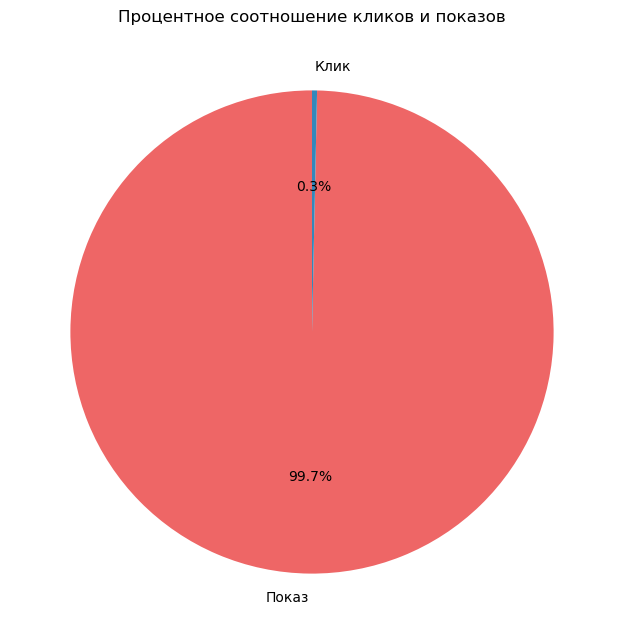

In [32]:
labels = ['Показ', 'Клик']
plt.pie(df_m['ev_type'].value_counts(), startangle=90, autopct='%1.1f%%', labels=labels)
plt.title("Процентное соотношение кликов и показов")
plt.show()

Мужчины почти не кликают по рекламе

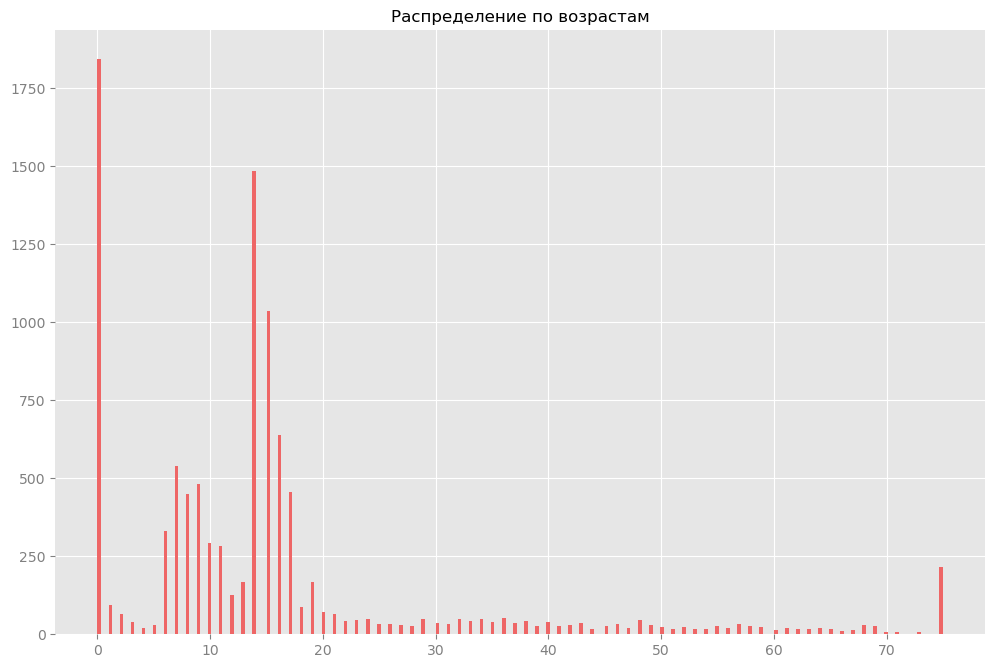

In [33]:
plt.hist(df_m['age'], bins=230)
plt.title("Распределение по возрастам")
plt.show()

In [97]:
logic_a = df['gender'] == 2
logic_2 = df['device_type'] == "android"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 1
logic_5 = df['ev_type'] == 1

for i, j in zip(range(20, 80, 10), range(30, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_m_e_a = df[logic_a & logic_2 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_m_e_a1 = df[logic_a & logic_2 & logic_4 & logic_6 & logic_6a]
    
    try:
        print(f"процентное отношение кол-ва м cтарше {i}, младше {j}: {round(df_m_e_a.shape[0] / df_m_e_a1.shape[0] * 100, 2)}")
    except:
        pass

процентное отношение кол-ва м cтарше 20, младше 30: 0.0
процентное отношение кол-ва м cтарше 30, младше 40: 0.0
процентное отношение кол-ва м cтарше 40, младше 50: 0.0
процентное отношение кол-ва м cтарше 50, младше 60: 1.09
процентное отношение кол-ва м cтарше 60, младше 70: 0.73
процентное отношение кол-ва м cтарше 70, младше 80: 0.0


In [98]:
logic_a = df['gender'] == 2
logic_2 = df['device_type'] == "android"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 2
logic_5 = df['ev_type'] == 1

for i, j in zip(range(20, 80, 10), range(30, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_m_e_a = df[logic_a & logic_2 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_m_e_a1 = df[logic_a & logic_2 & logic_4 & logic_6 & logic_6a]
    
    try:
        print(f"процентное отношение кол-ва м cтарше {i}, младше {j}: {round(df_m_e_a.shape[0] / df_m_e_a1.shape[0] * 100, 2)}")
    except:
        pass

процентное отношение кол-ва м cтарше 20, младше 30: 0.0
процентное отношение кол-ва м cтарше 30, младше 40: 0.0
процентное отношение кол-ва м cтарше 40, младше 50: 1.47
процентное отношение кол-ва м cтарше 50, младше 60: 1.72
процентное отношение кол-ва м cтарше 60, младше 70: 1.75
процентное отношение кол-ва м cтарше 70, младше 80: 0.0


In [95]:
logic_2 = df['device_type'] == "ios"
logic_3 = df['adv_type'] == "video"
logic_4 = df['region_id'] == 1
logic_5 = df['ev_type'] == 1

for i, j in zip(range(10, 80, 10), range(20, 90, 10)):
    logic_6 = (df['age'] >= i)
    logic_6a = (df['age'] <= j)
    df_m_e_a = df[logic_a & logic_2 & logic_3 & logic_4 & logic_5 & logic_6 & logic_6a]
    df_m_e_a1 = df[logic_a & logic_2 & logic_3 & logic_4 & logic_6 & logic_6a]
    
    try:
        print(f"процентное отношение кол-ва м cтарше {i}, младше {j}: {round(df_m_e_a.shape[0] / df_m_e_a1.shape[0] * 100, 2)}")
    except:
        pass

Мужчин в целом очень мало, среди них преобладают дошкольники и подростки, для них реклама была эффективна

In [43]:
from scipy import stats
import scipy as sp

In [44]:
def t_test_verbose(a, sample2=None, mean=None, fn=None):
    '''Служебная функция с подробной информацией 
       результата t-теста Уэлша'''
    abar = a.mean()
    avar = a.var(ddof=1)  # несмещенное значение
    na = a.size
    adof = na - 1
    conf_int = stats.t.interval(0.95, len(a)-1, 
                                loc=sp.mean(a), scale=stats.sem(a))

    if type(a) == type(sample2):
        bbar = sample2.mean()
        bvar = sample2.var(ddof=1)
        nb = sample2.size
        bdof = nb - 1

        dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
        return {'p-значение'           : 
                   fn(a, sample2, equal_var=False).pvalue,  #  выполняет t-тест Уэлша   
                'степени свободы     ' : dof,  #t_test(a, b),   
                'интервал уверенности' : conf_int,         
                'n1          ' : a.count(),
                'n2          ' : sample2.count(),
                'среднее x   ' : a.mean(),
                'среднее y   ' : sample2.mean(),
                'дисперсия x ' : a.var(),
                'дисперсия y ' : sample2.var(),
                't-статистика' : fn( a, sample2, equal_var=False ).statistic} 
    else:
        dof = (avar/na) / (avar/(na*adof))
        return {'p-значение          ' : fn(a, mean).pvalue,    
                'степени свободы df  ' : dof,    
                'интервал уверенности' : conf_int, 
                'n1                  ' : a.count(),
                'среднее x           ' : a.mean(),
                'дисперсия x         ' : a.var(),
                't-статистика        ' : fn(a, mean).statistic} 

In [45]:
def double_t(df):
    '''Двухсторонний t-тест'''
    groups = df.groupby('gender')['ev_type']
    
    a = groups.get_group(0)
    b = groups.get_group(1)    
    return t_test_verbose(a, sample2=b, fn=stats.ttest_ind) #t-тест Уэлша

In [46]:
double_t(df)

<ipython-input-44-e5483eda60c7>:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  loc=sp.mean(a), scale=stats.sem(a))


{'p-значение': 3.978536852249654e-152,
 'степени свободы     ': 59491.84157598919,
 'интервал уверенности': (0.003799447131412467, 0.005372599293253283),
 'n1          ': 28347,
 'n2          ': 226616,
 'среднее x   ': 0.004586023212332875,
 'среднее y   ': 0.017399477530271473,
 'дисперсия x ': 0.004565152648784594,
 'дисперсия y ': 0.017096811155941503,
 't-статистика': -26.348776472072974}

Получается вероятность клика у мужчин 0.3 +- 3*0.017, у женщин 2+-3*0.04 что намного больше. Т.е. клик рейт сильно больше

### <div style='background:#2b9084;color:white;padding:0.5em;border-radius:0.2em'>Пользователи дети</div>

In [104]:
logic_ch = df['age'] <= 16

df_ch = df[logic_ch]

print(f"процентное отношение кол-ва детей и подростков в датасете: {round(df_ch.shape[0] / df.shape[0] * 100, 2)}")

процентное отношение кол-ва детей и подростков в датасете: 19.39


In [105]:
df_ch_e = df[logic_ch & logic_5]

print(f"процентное отношение кол-ва детей и подростков в датасете, которые кликают: {round(df_ch_e.shape[0] / df_ch.shape[0] * 100, 2)}")

процентное отношение кол-ва детей и подростков в датасете, которые кликают: 0.52


In [148]:
logic_g = df['gender'] == 2

for i in range(2, 17, 1):
    
    logic_ch = df['age'] <= i

    df_ch_e_g1 = df[logic_g & logic_ch]
    df_ch_e_g = df[logic_g & logic_5 & logic_ch]

    print(f"процентное отношение кол-ва детей мальчиков, которые кликают: {round(df_ch_e_g.shape[0] / df_ch_e_g1.shape[0] * 100, 2)}")

процентное отношение кол-ва детей мальчиков, которые кликают: 0.25
процентное отношение кол-ва детей мальчиков, которые кликают: 0.25
процентное отношение кол-ва детей мальчиков, которые кликают: 0.24
процентное отношение кол-ва детей мальчиков, которые кликают: 0.24
процентное отношение кол-ва детей мальчиков, которые кликают: 0.25
процентное отношение кол-ва детей мальчиков, которые кликают: 0.3
процентное отношение кол-ва детей мальчиков, которые кликают: 0.35
процентное отношение кол-ва детей мальчиков, которые кликают: 0.33
процентное отношение кол-ва детей мальчиков, которые кликают: 0.36
процентное отношение кол-ва детей мальчиков, которые кликают: 0.36
процентное отношение кол-ва детей мальчиков, которые кликают: 0.35
процентное отношение кол-ва детей мальчиков, которые кликают: 0.38
процентное отношение кол-ва детей мальчиков, которые кликают: 0.37
процентное отношение кол-ва детей мальчиков, которые кликают: 0.34
процентное отношение кол-ва детей мальчиков, которые кликают: 0

In [150]:
logic_g = df['gender'] == 1
for i in range(2, 17, 1):
    
    logic_ch = df['age'] <= i

    df_ch_e_g1 = df[logic_g & logic_ch]
    df_ch_e_g = df[logic_g & logic_5 & logic_ch]

    print(f"процентное отношение кол-ва детей девочек, которые кликают: {round(df_ch_e_g.shape[0] / df_ch_e_g1.shape[0] * 100, 2)}")

процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.5
процентное отношение кол-ва детей девочек, которые кликают: 0.49
процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.54
процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.56
процентное отношение кол-ва детей девочек, которые кликают: 0.55
процентное отношение кол-ва детей девочек, которые кликают: 0.53
процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.51
процентное отношение кол-ва детей девочек, которые кликают: 0.59
процентное отношение кол-ва детей девочек, которые кликают: 0.65
процентное отношение кол-ва детей девочек, которые кликают: 0.73


Дети так же мало кликают на рекламу

In [178]:
df[df['device_id'] == 100288]

,device_id,device_type,datetime,ev_type,adv_type,region_id,age,gender
1185,100288,android,2019-03-01 19:45:50,0,multi,2,12,1
1186,100288,android,2019-03-04 11:10:13,0,multi,2,6,2
1187,100288,android,2019-03-05 09:20:59,0,multi,1,0,0
1188,100288,android,2019-03-01 11:06:01,0,multi,1,0,0
1189,100288,android,2019-03-01 10:13:22,0,multi,1,0,0
1190,100288,android,2019-03-02 18:34:28,0,multi,2,0,0
1191,100288,android,2019-03-01 11:47:45,0,multi,2,6,2
1192,100288,android,2019-03-01 16:25:31,0,multi,1,14,1
1193,100288,android,2019-03-04 12:38:06,0,multi,2,6,2
1194,100288,android,2019-03-06 13:42:29,0,video,2,29,1


странная штука с device_id ... почему с одного устройства 50 разных человек заходит. Возможно недостоверные данные

### <div style='background:#2b9084;color:white;padding:0.5em;border-radius:0.2em'>Удобное время для рекламы</div>

In [290]:
df_new = df.copy()
# df_new["day_time"] = pd.to_timedelta(df["datetime"].str.split().str[1])
df_new['time_hour'] = df_new['datetime'].apply(lambda x: x[11:])
df_new['hour'] = df_new['time_hour'].apply(lambda x: int(x[:2]))
df_new['time_hour'] = pd.to_datetime(df_new['time_hour'], format='%H:%M:%S').dt.time

df_new

,device_id,device_type,datetime,ev_type,adv_type,region_id,age,gender,time_hour,hour
0,100001,android,2019-03-01 15:58:02,0,multi,2,14,2,15:58:02,15
1,100001,android,2019-03-01 17:13:53,0,multi,2,14,2,17:13:53,17
2,100002,android,2019-03-01 23:13:25,0,multi,2,0,0,23:13:25,23
3,100002,android,2019-03-01 23:25:06,0,multi,2,0,0,23:25:06,23
4,100003,android,2019-03-01 15:27:53,0,multi,1,0,0,15:27:53,15
...,...,...,...,...,...,...,...,...,...,...
265398,287154,android,2019-03-08 16:23:09,0,video,2,31,1,16:23:09,16
265399,287155,android,2019-03-08 15:09:58,0,video,1,52,1,15:09:58,15
265400,287156,android,2019-03-08 18:13:27,0,video,1,20,1,18:13:27,18
265401,287157,android,2019-03-08 15:48:19,0,video,1,25,1,15:48:19,15


In [291]:
logic_h1 = df_new['ev_type'] == 1
logic_h2 = df_new['ev_type'] == 0

df_h2 = df_new[logic_h2]
df_h1 = df_new[logic_h1]

df_h1.shape[0], df_h2.shape[0], df_new.shape[0]

(4108, 261295, 265403)

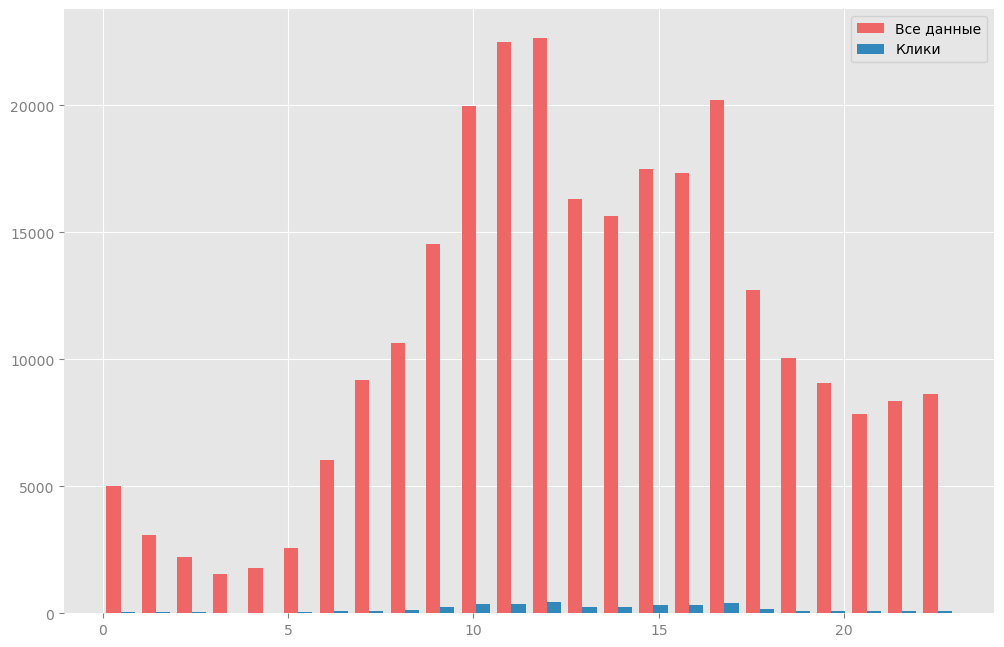

In [297]:
plt.hist([df_new['hour'], df_h1['hour']], bins=24)
plt.legend(['Все данные', 'Клики'])
# plt.hist();

**Вывод**:

    - возможно стоит перенести время показа рекламы с 20 часов по 5 утра на дневное время